In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Read files
store_6762 = pd.read_excel('6762 - P+H (1).xlsx')
store_8741 = pd.read_excel('8741 - Small Store - Επαρχία.xlsx')
store_7331 = pd.read_excel('7331 - Small Store Athens.xlsx')
store_7498 = pd.read_excel('7498 - PBL Malls.xlsx')
opa_final = pd.read_excel('ΟΠΑ data final (1).xlsx', sheet_name = None)
visitors = opa_final['Visitors']
receipts = opa_final['Receipts']
schedule = opa_final['Schedule']


In [195]:
#Merge sheet visitors & receipts
opa_final_merged= pd.merge(receipts, visitors, on=['store', 'hour', 'date'], how='inner')
opa_final_merged

,store,receipts,hour,date,visitors
0,6762,69,18,2024-03-09,131
1,8741,18,14,2024-02-26,73
2,8741,35,11,2024-04-30,152
3,6762,48,21,2024-01-05,0
4,7331,34,16,2024-04-13,77
...,...,...,...,...,...
14132,7331,22,17,2024-05-15,69
14133,7498,41,21,2024-11-29,0
14134,7498,32,17,2024-09-13,270
14135,6762,31,13,2024-01-14,74


In [198]:
difference_gte_50_df = opa_final_merged[(opa_final_merged['receipts'] - opa_final_merged['visitors']) >= 50]
print("\nRows where receipts - visitors >= 50:")
print(difference_gte_50_df)



Rows where receipts - visitors >= 50:
       store  receipts  hour       date  visitors
171     6762        90    21 2024-03-09         0
337     6762        54    18 2024-11-06         0
341     6762        56    21 2024-09-03         0
345     7498        69    21 2024-09-09         0
388     7498       173    21 2024-10-05         0
...      ...       ...   ...        ...       ...
13785   7331        56    11 2024-10-19         0
13803   6762        59    21 2024-09-12         0
13804   8741        92    21 2024-11-28         0
13873   8741        81    18 2024-05-03         5
13967   6762       273    11 2024-09-13        95

[160 rows x 5 columns]


## To filtering tis alk

In [201]:
difference_gte_50_df = opa_final_merged[(opa_final_merged['receipts'] - opa_final_merged['visitors']) >= 50]
print("\nRows where receipts - visitors >= 50:")
print(difference_gte_50_df)
timeline_data = []
true_count = 0
for _, current_row in difference_gte_50_df.iterrows():
    previous_row_1 = opa_final_merged[
        (opa_final_merged ['store'] == current_row['store']) &
        (opa_final_merged ['date'] == current_row['date']) &
        (opa_final_merged ['hour'] == current_row['hour'] - 1)
    ]
    previous_row_2 = opa_final_merged [
        (opa_final_merged ['store'] == current_row['store']) &
        (opa_final_merged ['date'] == current_row['date']) &
        (opa_final_merged ['hour'] == current_row['hour'] - 2)
    ]
    previous_row_3 = opa_final_merged [
        (opa_final_merged ['store'] == current_row['store']) &
        (opa_final_merged ['date'] == current_row['date']) &
        (opa_final_merged ['hour'] == current_row['hour'] - 3)
    ]
    if current_row['visitors'] == 0:
        formula_condition = (
            ((previous_row_3['visitors'].iloc[0] - previous_row_3['receipts'].iloc[0]) +
             (previous_row_2['visitors'].iloc[0] - previous_row_2['receipts'].iloc[0])) * 3
        ) <= current_row['receipts'] if not previous_row_3.empty and not previous_row_2.empty else False

        if formula_condition:
            true_count += 1

        timeline_data.append({
            "Previous Row (Hour - 1)": previous_row_1.iloc[0].to_dict() if not previous_row_1.empty else None,
            "Previous Row (Hour - 2)": previous_row_2.iloc[0].to_dict() if not previous_row_2.empty else None,
            "Previous Row (Hour - 3)": previous_row_3.iloc[0].to_dict() if not previous_row_3.empty else None,
            "Current Row": {**current_row.to_dict(), "index": current_row.name},
            "Formula Condition Met": formula_condition
        })

# Print the timeline data with the formula condition
print("\nTimeline Data (Previous Rows and Current Row with Formula Condition):")
for pair in timeline_data:
    print("Previous Row (Hour - 3):", pair["Previous Row (Hour - 3)"])
    print("Previous Row (Hour - 2):", pair["Previous Row (Hour - 2)"])
    print("Previous Row (Hour - 1):", pair["Previous Row (Hour - 1)"])
    print("Current Row:", pair["Current Row"])
    print("Formula Condition Met:", pair["Formula Condition Met"])
    print("---")

# Print the count of rows where the formula condition was met
print(f"\nCount of rows where the formula condition was met: {true_count}")
to_remove_indices = [pair['Current Row']['index'] for pair in timeline_data if pair['Formula Condition Met']]
opa_final_merged = opa_final_merged.drop(index=to_remove_indices)


Rows where receipts - visitors >= 50:
       store  receipts  hour       date  visitors
171     6762        90    21 2024-03-09         0
337     6762        54    18 2024-11-06         0
341     6762        56    21 2024-09-03         0
345     7498        69    21 2024-09-09         0
388     7498       173    21 2024-10-05         0
...      ...       ...   ...        ...       ...
13785   7331        56    11 2024-10-19         0
13803   6762        59    21 2024-09-12         0
13804   8741        92    21 2024-11-28         0
13873   8741        81    18 2024-05-03         5
13967   6762       273    11 2024-09-13        95

[160 rows x 5 columns]

Timeline Data (Previous Rows and Current Row with Formula Condition):
Previous Row (Hour - 3): {'store': 6762, 'receipts': 69, 'hour': 18, 'date': Timestamp('2024-03-09 00:00:00'), 'visitors': 131}
Previous Row (Hour - 2): {'store': 6762, 'receipts': 98, 'hour': 19, 'date': Timestamp('2024-03-09 00:00:00'), 'visitors': 113}
Previous R

In [203]:
opa_final_merged

,store,receipts,hour,date,visitors
0,6762,69,18,2024-03-09,131
1,8741,18,14,2024-02-26,73
2,8741,35,11,2024-04-30,152
3,6762,48,21,2024-01-05,0
4,7331,34,16,2024-04-13,77
...,...,...,...,...,...
14132,7331,22,17,2024-05-15,69
14133,7498,41,21,2024-11-29,0
14134,7498,32,17,2024-09-13,270
14135,6762,31,13,2024-01-14,74


## Apo edw kai katw

In [206]:
#Make a table with avg NPS per store
NPS_means=[['6762',store_6762['NPS'].mean()],['8741',store_8741['NPS'].mean()],[ '7498',store_7498['NPS'].mean()],['7331',store_7331['NPS'].mean()]]
NPS_means =pd.DataFrame(NPS_means, columns=['store', 'NPS'])
NPS_means

,store,NPS
0,6762,67.199044
1,8741,85.984093
2,7498,73.008748
3,7331,72.304515


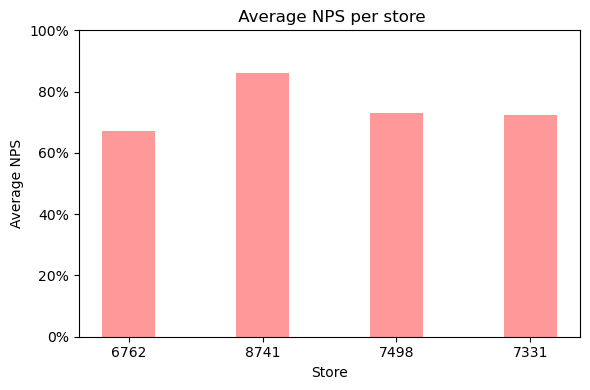

In [208]:
from matplotlib.ticker import PercentFormatter
plt.figure(figsize=(6, 4))
plt.bar(NPS_means['store'], NPS_means['NPS'], color='red', alpha=0.4,width=0.4)

plt.ylim(0, 100)
plt.xlabel('Store')
plt.ylabel('Average NPS')
plt.title(' Average NPS per store')
plt.gca().yaxis.set_major_formatter(PercentFormatter(100))
plt.tight_layout()
plt.show()

In [210]:
#Make diff tables for each store
s6762 = opa_final_merged [opa_final_merged ['store']==6762]
s8741 = opa_final_merged [opa_final_merged ['store']==8741]
s7331= opa_final_merged [opa_final_merged ['store']==7331]
s7498 = opa_final_merged [opa_final_merged ['store']==7498]

In [212]:
#Def for outliers removal taking lower bound of visitors and receipts = 0
numeric_columns = ['visitors', 'receipts']
def remove_outliers_iqr(df, columns):
    lower_bound = 0
    for col in columns:
        Q1 = df[col].quantile(0.25) 
        Q3 = df[col].quantile(0.75) 
        IQR = Q3 - Q1             
        upper_bound = Q3 + 1.5 * IQR
        print(col,lower_bound,upper_bound)
        
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df
#Remove outliers for each store seperately
s6762=remove_outliers_iqr(s6762, numeric_columns)
s8741=remove_outliers_iqr(s8741, numeric_columns)
s7331=remove_outliers_iqr(s7331, numeric_columns)
s7498=remove_outliers_iqr(s7498, numeric_columns)

visitors 0 199.0
receipts 0 65.5
visitors 0 264.5
receipts 0 87.0
visitors 0 237.5
receipts 0 80.5
visitors 0 651.5
receipts 0 158.0


In [214]:
#Find buying percentage per store
stores = [s6762, s8741,s7498, s7331]
receipts_per_visitors = []

for store in stores:
    avg_receipts = store['receipts'].mean()
    avg_visitors = store['visitors'].mean()
    store_name = str(store.iloc[0,0])
    receiptspervisitors = avg_receipts/avg_visitors*100
    new_row = [store_name,receiptspervisitors]
    receipts_per_visitors.append(new_row)



In [216]:
receipts_per_visitors= pd.DataFrame(receipts_per_visitors, columns=['store','buying percentage'])
receipts_per_visitors

,store,buying percentage
0,6762,34.720964
1,8741,34.283970
2,7498,25.799522
3,7331,36.808812


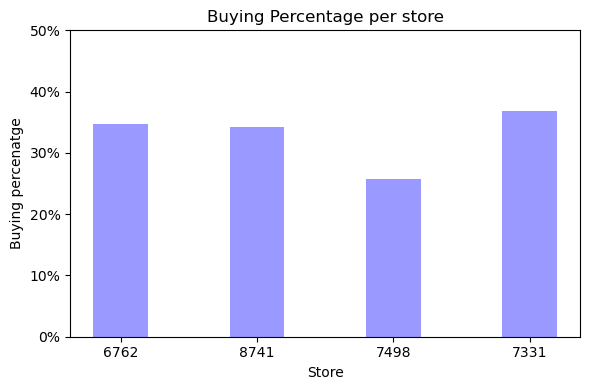

In [218]:
from matplotlib.ticker import PercentFormatter
#Create 'Buying Percentage per store' plot

plt.figure(figsize=(6, 4))
plt.bar(receipts_per_visitors['store'], receipts_per_visitors['buying percentage'], color='blue', alpha=0.4,width=0.4)

plt.ylim(0, 50)
plt.xlabel('Store')
plt.ylabel('Buying percenatge')
plt.title('Buying Percentage per store')
plt.gca().yaxis.set_major_formatter(PercentFormatter(100))
plt.tight_layout()
plt.show()

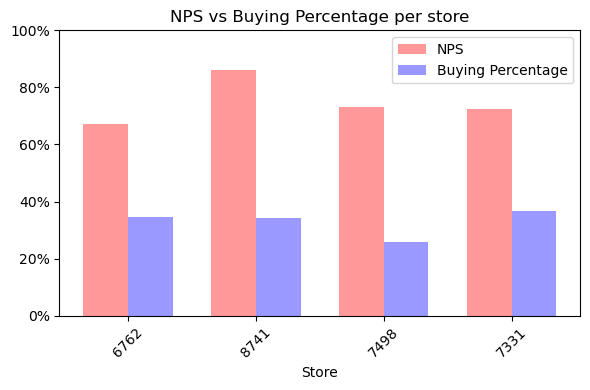

In [219]:
import matplotlib.pyplot as plt
import numpy as np
#Create 'NPS vs Buying Percentage per store' plot
NPS_REC_merged=pd.merge(receipts_per_visitors,NPS_means, on='store')
x = np.arange(len(NPS_REC_merged['store']))
width = 0.35
fig, ax = plt.subplots(figsize=(6, 4))

ax.bar(x - width / 2, NPS_REC_merged['NPS'], width, label='NPS', color = 'red', alpha=0.4 )

ax.bar(x + width / 2, NPS_REC_merged['buying percentage'], width, label='Buying Percentage', color = 'blue' ,alpha=0.4)
ax.set_xlabel('Store')

ax.set_title('NPS vs Buying Percentage per store')
ax.legend()

plt.gca().yaxis.set_major_formatter(PercentFormatter(100))
ax.set_xticks(x)
ax.set_xticklabels(NPS_REC_merged['store'])
plt.ylim(0, 100)
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [220]:
merged= pd.concat([s6762, s8741,s7498, s7331], ignore_index=True) 
merged['month'] = merged['date'].dt.to_period('M')

group_by_store_receipts_visitors = merged.groupby(['store','month'])[['visitors', 'receipts']].mean()
group_by_store_receipts_visitors.reset_index(inplace=True)
group_by_store_receipts_visitors['month_name'] = group_by_store_receipts_visitors['month'].dt.strftime('%B')
group_by_store_receipts_visitors

,store,month,visitors,receipts,month_name
0,6762,2024-01,79.024735,30.869258,January
1,6762,2024-02,70.083067,28.137380,February
2,6762,2024-03,64.800000,26.696552,March
3,6762,2024-04,75.053521,22.357746,April
4,6762,2024-05,81.903846,26.361538,May
5,6762,2024-06,86.940063,26.208202,June
6,6762,2024-07,87.612069,25.732759,July
7,6762,2024-08,87.322917,24.857639,August
8,6762,2024-09,88.871324,33.191176,September
9,6762,2024-10,60.862928,28.928349,October


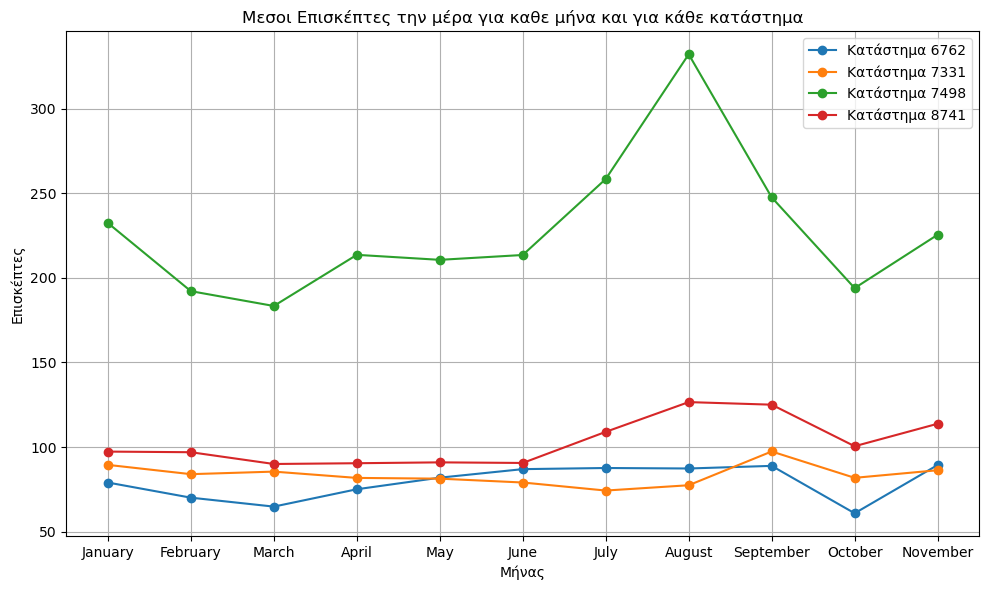

In [224]:

#Plot for avg visitors for each month and each store
plt.figure(figsize=(10, 6))


for store, group_data in group_by_store_receipts_visitors.groupby('store'):
    plt.plot(group_data['month_name'], group_data['visitors'], label=f'Κατάστημα {store}', marker='o')


plt.title('Μεσοι Επισκέπτες την μέρα για καθε μήνα και για κάθε κατάστημα')
plt.xlabel('Μήνας')
plt.ylabel('Επισκέπτες')
plt.legend()
plt.grid(True)

# Εμφάνιση γραφήματος
plt.tight_layout()
plt.show()

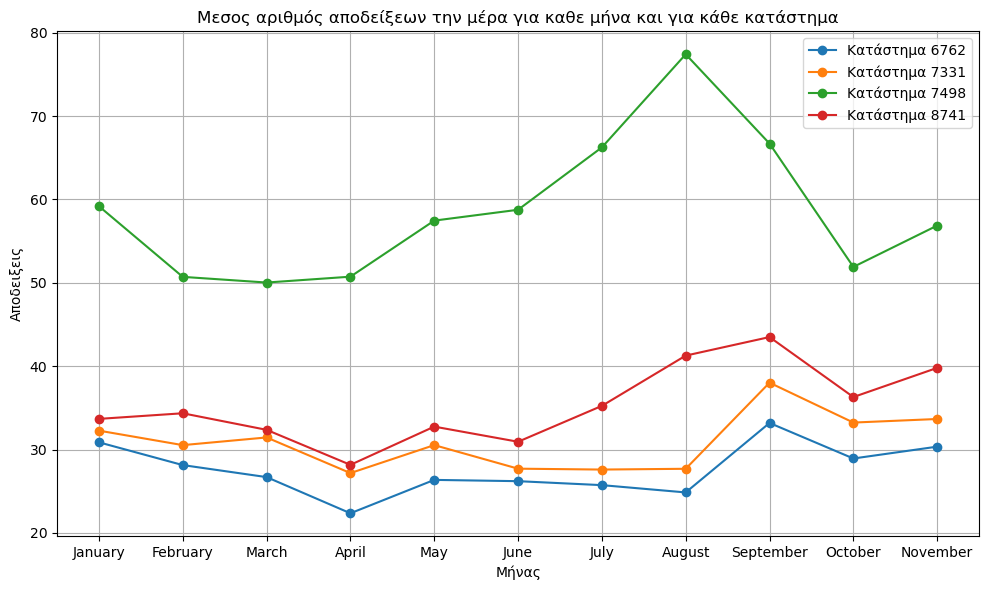

In [225]:
#Plot for avg receipts for each month and each store
plt.figure(figsize=(10, 6))


for store, group_data in group_by_store_receipts_visitors.groupby('store'):
    plt.plot(group_data['month_name'], group_data['receipts'], label=f'Κατάστημα {store}', marker='o')


plt.title('Μεσος αριθμός αποδείξεων την μέρα για καθε μήνα και για κάθε κατάστημα')
plt.xlabel('Μήνας')
plt.ylabel('Αποδειξεις')
plt.legend()
plt.grid(True)

# Εμφάνιση γραφήματος
plt.tight_layout()
plt.show()

In [227]:
avg_store = merged.groupby(['store'])[['visitors', 'receipts']].mean()
avg_store.reset_index(inplace=True)
avg_store


,store,visitors,receipts
0,6762,79.069524,27.453701
1,7331,83.119155,30.595173
2,7498,227.695213,58.744276
3,8741,102.433626,35.118313


In [228]:
store_6762 = store_6762.iloc[1:]
store_8741 = store_8741.iloc[1:]
store_7331 = store_7331.iloc[1:]
store_7498 = store_7498.iloc[1:]
print(store_6762_)

    MonthYear  Detractors %  Passives %  Promoters %        NPS  \
5  2024-05-01      0.046025    0.096234     0.857741  81.171548   
6  2024-06-01      0.119403    0.084577     0.796020  67.661692   
7  2024-07-01      0.140271    0.131222     0.728507  58.823529   
8  2024-08-01      0.168367    0.122449     0.709184  54.081633   
9  2024-09-01      0.109804    0.129412     0.760784  65.098039   
10 2024-10-01      0.114983    0.090592     0.794425  67.944251   
11 2024-11-01      0.103896    0.111688     0.784416  68.051948   
12 2024-12-01      0.094170    0.165919     0.739910  64.573991   

    NPS Response Count    month month_name  
5                  239  2024-05        May  
6                  201  2024-06       June  
7                  221  2024-07       July  
8                  196  2024-08     August  
9                  255  2024-09  September  
10                 287  2024-10    October  
11                 385  2024-11   November  
12                 223  2024-12   De

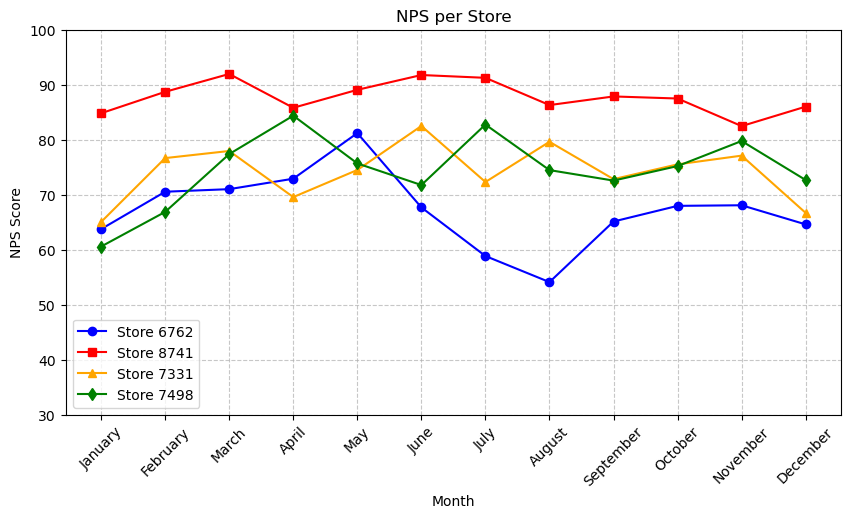

In [232]:

store_6762['MonthYear'] = pd.to_datetime(store_6762['MonthYear'])
store_6762['month'] = store_6762['MonthYear'].dt.to_period('M')
store_6762['month_name'] = store_6762['month'].dt.strftime('%B')

store_8741['MonthYear'] = pd.to_datetime(store_8741['MonthYear'])
store_8741['month'] = store_8741['MonthYear'].dt.to_period('M')
store_8741['month_name'] = store_8741['month'].dt.strftime('%B')

store_7331['MonthYear'] = pd.to_datetime(store_7331['MonthYear'])
store_7331['month'] = store_7331['MonthYear'].dt.to_period('M')
store_7331['month_name'] = store_7331['month'].dt.strftime('%B')

store_7498['MonthYear'] = pd.to_datetime(store_7498['MonthYear'])
store_7498['month'] = store_7498['MonthYear'].dt.to_period('M')
store_7498['month_name'] = store_7498['month'].dt.strftime('%B')


plt.figure(figsize=(10, 5))
plt.ylim(30, 100)


plt.plot(store_6762['month_name'], store_6762['NPS'], marker='o', color = 'blue', label="Store 6762")
plt.plot(store_8741['month_name'], store_8741['NPS'], marker='s', color = 'red', label="Store 8741")
plt.plot(store_7331['month_name'], store_7331['NPS'], marker='^',color = 'orange', label="Store 7331")
plt.plot(store_7498['month_name'], store_7498['NPS'], marker='d', color = 'green', label="Store 7498")


plt.xlabel("Month")
plt.ylabel("NPS Score")
plt.title("NPS per Store")
plt.xticks(rotation=45)  
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7) 
